In [16]:
import pandas as pd
from pycaret.clustering import setup, create_model, plot_model, assign_model, save_model, load_model, predict_model
#biblioteki do znalezienia optymalnej liczby klastrów
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

### Załadowanie danych

In [92]:
df = pd.read_csv('welcome_survey_simple_v2.csv', sep= ';')
df.head()

age   edu_level      fav_animals fav_place     gender
0    <18  Podstawowe  Brak ulubionych       NaN    Kobieta
1  25-34     Średnie              Psy  Nad wodą  Mężczyzna
2  45-54      Wyższe              Psy   W lesie  Mężczyzna
3  35-44     Średnie             Koty  W górach  Mężczyzna
4  35-44      Wyższe              Psy  Nad wodą  Mężczyzna

In [93]:
#przekształcenie danych tekstowych na numeryczne - żeby przeprowadzić dalsze skalowanie
label_encoder = LabelEncoder()
df['age_num'] = label_encoder.fit_transform(df['age'])
df['edu_level_num'] = label_encoder.fit_transform(df['edu_level'])
df['fav_animals_num'] = label_encoder.fit_transform(df['fav_animals'])
df['fav_place_num'] = label_encoder.fit_transform(df['fav_place'])
df['gender_num'] = label_encoder.fit_transform(df['gender'])
#tworzenie nowego DF tylko z numerycznymi kolumnami
num_df = df.drop(columns=['age', 'edu_level', 'fav_animals', 'fav_place', 'gender'])
num_df.head()

age_num  edu_level_num  fav_animals_num  fav_place_num  gender_num
0        5              0                0              4           0
1        1              2                4              1           1
2        3              1                4              3           1
3        2              2                2              2           1
4        2              1                4              1           1

### Standaryzacja danych

In [94]:
#Skalowanie danych
scaler = StandardScaler()
#tworzymy nowy wyskalowany DF
data_scaled = scaler.fit_transform(num_df)

### Obliczamy optymalną liczbę klastrów - 1) Metoda Łokcia

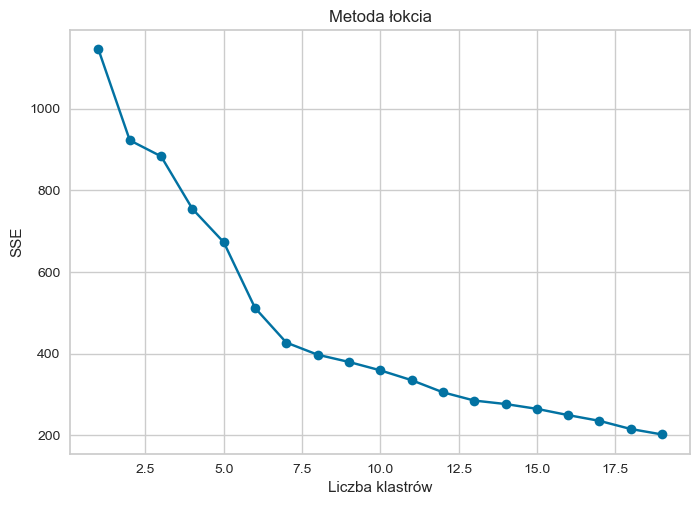

In [109]:
# Metoda łokcia
sse = []
clusters = range(1, 20)

#ustawiam ziarno losowe - dzięki temu za każdym razem, gdy uruchomię kod, centroidy będą inicjalizowane w ten sam sposób, co pozwoli na uzyskanie tych samych wyników.
seed = 42

for num_clusters in clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state= seed)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Rysowanie wykresu
plt.plot(clusters, sse, marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('SSE')
plt.title('Metoda łokcia')
plt.show()

### Obliczamy optymalną liczbę klastrów - 2) Wskaźnik sylwetkowy

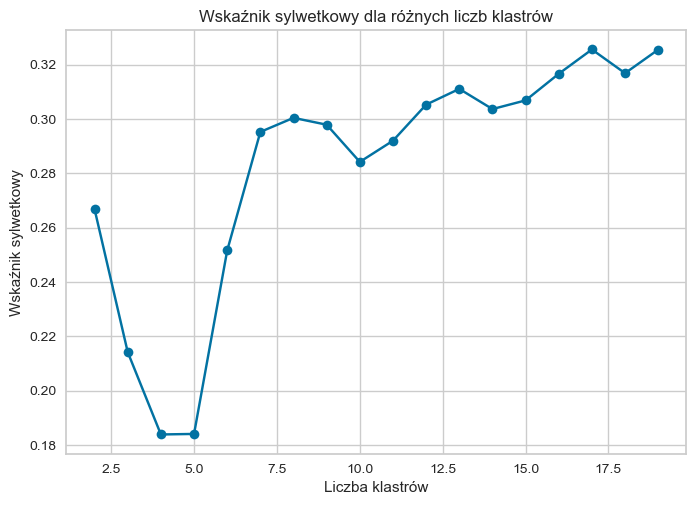

In [110]:
# Wskaźnik sylwetkowy
silhouette_scores = []

seed = 42

for num_clusters in clusters[1:]:
    kmeans = KMeans(n_clusters=num_clusters, random_state = seed)
    kmeans.fit(data_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Rysowanie wykresu
plt.plot(clusters[1:], silhouette_scores, marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Wskaźnik sylwetkowy')
plt.title('Wskaźnik sylwetkowy dla różnych liczb klastrów')
plt.show()

In [66]:
len(df)

229

In [10]:
s = setup(df, session_id = 123)
s

In [11]:
s.dataset.head()

age   edu_level      fav_animals fav_place     gender
0    <18  Podstawowe  Brak ulubionych       NaN    Kobieta
1  25-34     Średnie              Psy  Nad wodą  Mężczyzna
2  45-54      Wyższe              Psy   W lesie  Mężczyzna
3  35-44     Średnie             Koty  W górach  Mężczyzna
4  35-44      Wyższe              Psy  Nad wodą  Mężczyzna

In [12]:
s.dataset_transformed.head()

age_<18  age_25-34  age_45-54  age_35-44  age_18-24  age_>=65  age_55-64  \
0      1.0        0.0        0.0        0.0        0.0       0.0        0.0   
1      0.0        1.0        0.0        0.0        0.0       0.0        0.0   
2      0.0        0.0        1.0        0.0        0.0       0.0        0.0   
3      0.0        0.0        0.0        1.0        0.0       0.0        0.0   
4      0.0        0.0        0.0        1.0        0.0       0.0        0.0   

   age_unknown  edu_level_Podstawowe  edu_level_Średnie  ...  \
0          0.0                   1.0                0.0  ...   
1          0.0                   0.0                1.0  ...   
2          0.0                   0.0                0.0  ...   
3          0.0                   0.0                1.0  ...   
4          0.0                   0.0                0.0  ...   

   fav_animals_Brak ulubionych  fav_animals_Psy  fav_animals_Koty  \
0                          1.0              0.0               0.0   
1                          0.0              1.0               0.0   
2                          0.0              1.0               0.0   
3                          0.0              0.0               1.0   
4                          0.0              1.0               0.0   

   fav_animals_Inne  fav_animals_Koty i Psy  fav_place_Nad wodą  \
0               0.0                     0.0                 1.0   
1               0.0                     0.0                 1.0   
2               0.0                     0.0                 0.0   
3               0.0                     0.0                 0.0   
4               0.0                     0.0                 1.0   

   fav_place_W lesie  fav_place_W górach  fav_place_Inne  gender  
0                0.0                 0.0             0.0     0.0  
1                0.0                 0.0             0.0     1.0  
2                1.0                 0.0             0.0     1.0  
3                0.0                 1.0             0.0     1.0  
4                0.0                 0.0             0.0     1.0  

[5 rows x 21 columns]

In [111]:
kmeans = create_model('kmeans', num_clusters = 8)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [112]:
df_with_clusters = assign_model(kmeans)
df_with_clusters

age   edu_level      fav_animals fav_place     gender    Cluster
0      <18  Podstawowe  Brak ulubionych       NaN    Kobieta  Cluster 5
1    25-34     Średnie              Psy  Nad wodą  Mężczyzna  Cluster 7
2    45-54      Wyższe              Psy   W lesie  Mężczyzna  Cluster 3
3    35-44     Średnie             Koty  W górach  Mężczyzna  Cluster 4
4    35-44      Wyższe              Psy  Nad wodą  Mężczyzna  Cluster 0
..     ...         ...              ...       ...        ...        ...
224  35-44      Wyższe             Koty      Inne    Kobieta  Cluster 2
225  45-54      Wyższe             Inne   W lesie  Mężczyzna  Cluster 3
226  25-34      Wyższe              Psy  W górach  Mężczyzna  Cluster 1
227  35-44      Wyższe  Brak ulubionych  W górach  Mężczyzna  Cluster 2
228  45-54      Wyższe             Koty  Nad wodą  Mężczyzna  Cluster 6

[229 rows x 6 columns]

In [114]:
df_with_clusters['Cluster'].value_counts()

Cluster
Cluster 0    48
Cluster 3    38
Cluster 1    34
Cluster 6    33
Cluster 4    26
Cluster 2    23
Cluster 7    18
Cluster 5     9
Name: count, dtype: int64

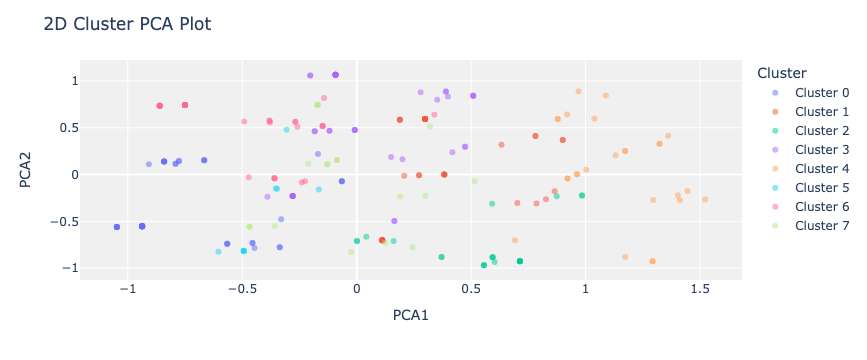

In [115]:
plot_model(kmeans, plot= 'cluster')

In [116]:
save_model(kmeans, 'welcome_survey_clustering_pipeline_v2', verbose= False)

(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=[], transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['age', 'edu_level', 'fav_animals',
                                              'fav_place', 'gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['gender'],
                                     transfo...
                                                                mapping=[{'col': 'gender',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': Kobieta      0
 Mężczyzna    1
 NaN         -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrappe

In [117]:
kmeans_pipeline = load_model('welcome_survey_clustering_pipeline_v2')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/03/jfcw3rjd6c9_pp9srs29gbxh0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=[], transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['age', 'edu_level', 'fav_animals',
                                             'fav_place', 'gender'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_...
                                                               mapping=[{'col': 'gender',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Kobieta      0
Mężczyzna    1
NaN         -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['age', 'edu_level', 'fav_animals',
                                             'fav_place'],
                                    transformer=OneHotEncoder(cols=['age',
                                                                    'edu_level',
                                                                    'fav_animals',
                                                                    'fav_place'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', KMeans(random_state=123))])

In [118]:
predict_df = pd.DataFrame([
    {
        'age' : '25-34',
        'edu_level' : 'Wyższe',
        'fav_animals' : 'Psy',
        'fav_place' : 'W górach',
        'gender' : 'Mężczyzna'
    }
])
predict_df

age edu_level fav_animals fav_place     gender
0  25-34    Wyższe         Psy  W górach  Mężczyzna

In [121]:
predict_df_with_clusters = predict_model(kmeans_pipeline, data= predict_df)
predict_df_with_clusters['Cluster']

0    Cluster 1
Name: Cluster, dtype: object